Import Libraries

In [1]:
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression, make_swiss_roll
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
print('All libraries imported successfully!')

All libraries imported successfully!


Load the Data

In [2]:
# Load data from a CSV file
df = pd.read_csv('tedsd_puf_2019.csv')
print('tedsd_puf_2019.csv loaded')
df.head()

tedsd_puf_2019.csv loaded


,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


Summary of the Data

In [3]:
# Summarize the data
print('The Shape of the DataFrame')
display(df.shape)
print('Description of the DataFrame')
display(df.describe())
print('Information about the DataFrame')
display(df.info())

The Shape of the DataFrame


(1722503, 76)

Description of the DataFrame


,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
count,1722503.0,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,...,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06,1.722503e+06
mean,2019.0,2.019087e+10,2.558714e+01,1.817492e+04,1.777766e+00,-5.340136e-01,5.540790e+00,-6.617934e+00,2.018519e+01,2.483211e+00,...,3.146584e-04,1.067052e-03,4.600863e-03,1.085629e-03,1.239475e-03,3.434421e-02,4.596869e+00,2.420380e+00,-4.622192e-01,1.945627e+00
std,0.0,5.065654e+05,1.427222e+01,1.728295e+04,3.731331e+00,4.470499e+00,1.938862e+00,5.031978e+00,1.433813e+01,4.037795e+00,...,1.773583e-02,3.264834e-02,6.767346e-02,3.293101e-02,3.518437e-02,1.821118e-01,2.560715e+00,1.144867e+00,2.492082e+00,8.534534e-01
min,2019.0,2.019000e+10,1.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,1.000000e+00,-9.000000e+00,1.000000e+00,-9.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+00,0.000000e+00
25%,2019.0,2.019044e+10,1.200000e+01,-9.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,-9.000000e+00,4.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00
50%,2019.0,2.019087e+10,2.700000e+01,1.674000e+04,3.000000e+00,1.000000e+00,7.000000e+00,-9.000000e+00,2.600000e+01,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00
75%,2019.0,2.019131e+10,3.600000e+01,3.562000e+04,3.000000e+00,2.000000e+00,7.000000e+00,-9.000000e+00,3.400000e+01,6.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00
max,2019.0,2.019176e+10,7.200000e+01,4.970000e+04,5.000000e+00,4.000000e+00,8.000000e+00,8.000000e+00,3.700000e+01,7.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00


Information about the DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722503 entries, 0 to 1722502
Data columns (total 76 columns):
 #   Column                 Dtype
---  ------                 -----
 0   DISYR                  int64
 1   CASEID                 int64
 2   STFIPS                 int64
 3   CBSA2010               int64
 4   EDUC                   int64
 5   MARSTAT                int64
 6   SERVICES               int64
 7   DETCRIM                int64
 8   LOS                    int64
 9   PSOURCE                int64
 10  NOPRIOR                int64
 11  ARRESTS                int64
 12  EMPLOY                 int64
 13  METHUSE                int64
 14  PSYPROB                int64
 15  PREG                   int64
 16  GENDER                 int64
 17  VET                    int64
 18  LIVARAG                int64
 19  DAYWAIT                int64
 20  SERVICES_D             int64
 21  REASON                 int64
 22  EMPLOY_D               int64
 23  

None

Data Cleaning

In [4]:
# Create a copy of the data
df1 = df.copy()
print('Copy of the DataFrame')
display(df1.head())

Copy of the DataFrame


,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [5]:
# Replace -9 with NaN
df1 = df1.replace(-9, np.nan)
print('Replacing -9 with NaN. A -9 represents a missing value code in the dataset.')
display(df1.head())

Replacing -9 with NaN. A -9 represents a missing value code in the dataset.


,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,NaN,4.0,1.0,7,NaN,37,1.0,...,0,0,0,0,0,0,9,4,0.0,1
1,2019,20191465214,2,NaN,3.0,1.0,7,NaN,35,1.0,...,0,0,0,0,0,0,9,4,0.0,3
2,2019,20191443889,2,NaN,2.0,1.0,7,NaN,35,1.0,...,0,0,0,0,0,0,9,4,0.0,3
3,2019,20191409377,2,NaN,3.0,1.0,7,NaN,37,1.0,...,0,0,0,0,0,0,9,4,0.0,3
4,2019,20191479567,2,NaN,3.0,3.0,7,NaN,37,1.0,...,0,0,0,0,0,0,9,4,0.0,1


In [6]:
# Find columns that contain NaN values
columns_with_nan = df1.isna().any()

# Count the number of columns that contain NaN values
num_columns_with_nan = columns_with_nan.sum()

# Print the number of columns that contain NaN values
print('There are',num_columns_with_nan,'columns that contain NaN.')

There are 47 columns that contain NaN.


In [7]:
# Find columns that contain NaN values
columns_with_nan = df1.columns[df1.isna().any()].tolist()

# Calculate the percentage of NaN values in each of these columns
nan_percentage = df1[columns_with_nan].isna().mean() * 100

# Sort the percentages in ascending order
nan_percentage_sorted = nan_percentage.sort_values(ascending=False)

# Print the percentage of NaN values
print('Percentage of NaN values in each column.')
display(nan_percentage_sorted)

Percentage of NaN values in each column.


FREQ3_D                  83.657329
DETCRIM                  81.155679
FREQ3                    79.651588
FRSTUSE3                 79.646247
ROUTE3                   79.101110
DETNLF_D                 77.345700
DETNLF                   72.679757
FREQ2_D                  68.706412
PREG                     65.995066
PRIMPAY                  57.472991
DAYWAIT                  53.454537
HLTHINS                  50.424586
FRSTUSE2                 49.004501
FREQ2                    47.489206
ROUTE2                   47.443807
CBSA2010                 40.871395
PRIMINC                  39.482195
FREQ1_D                  31.182761
DSMCRIT                  23.820626
FREQ_ATND_SELF_HELP_D    21.886464
MARSTAT                  20.954216
LIVARAG_D                20.595262
ARRESTS_D                19.748180
FREQ_ATND_SELF_HELP      18.987137
EMPLOY_D                 18.743538
PSYPROB                  13.084157
SUB1_D                   12.610718
FREQ1                    11.429414
SUB3                

Bar plot showing the percentage of NaN values in columns.


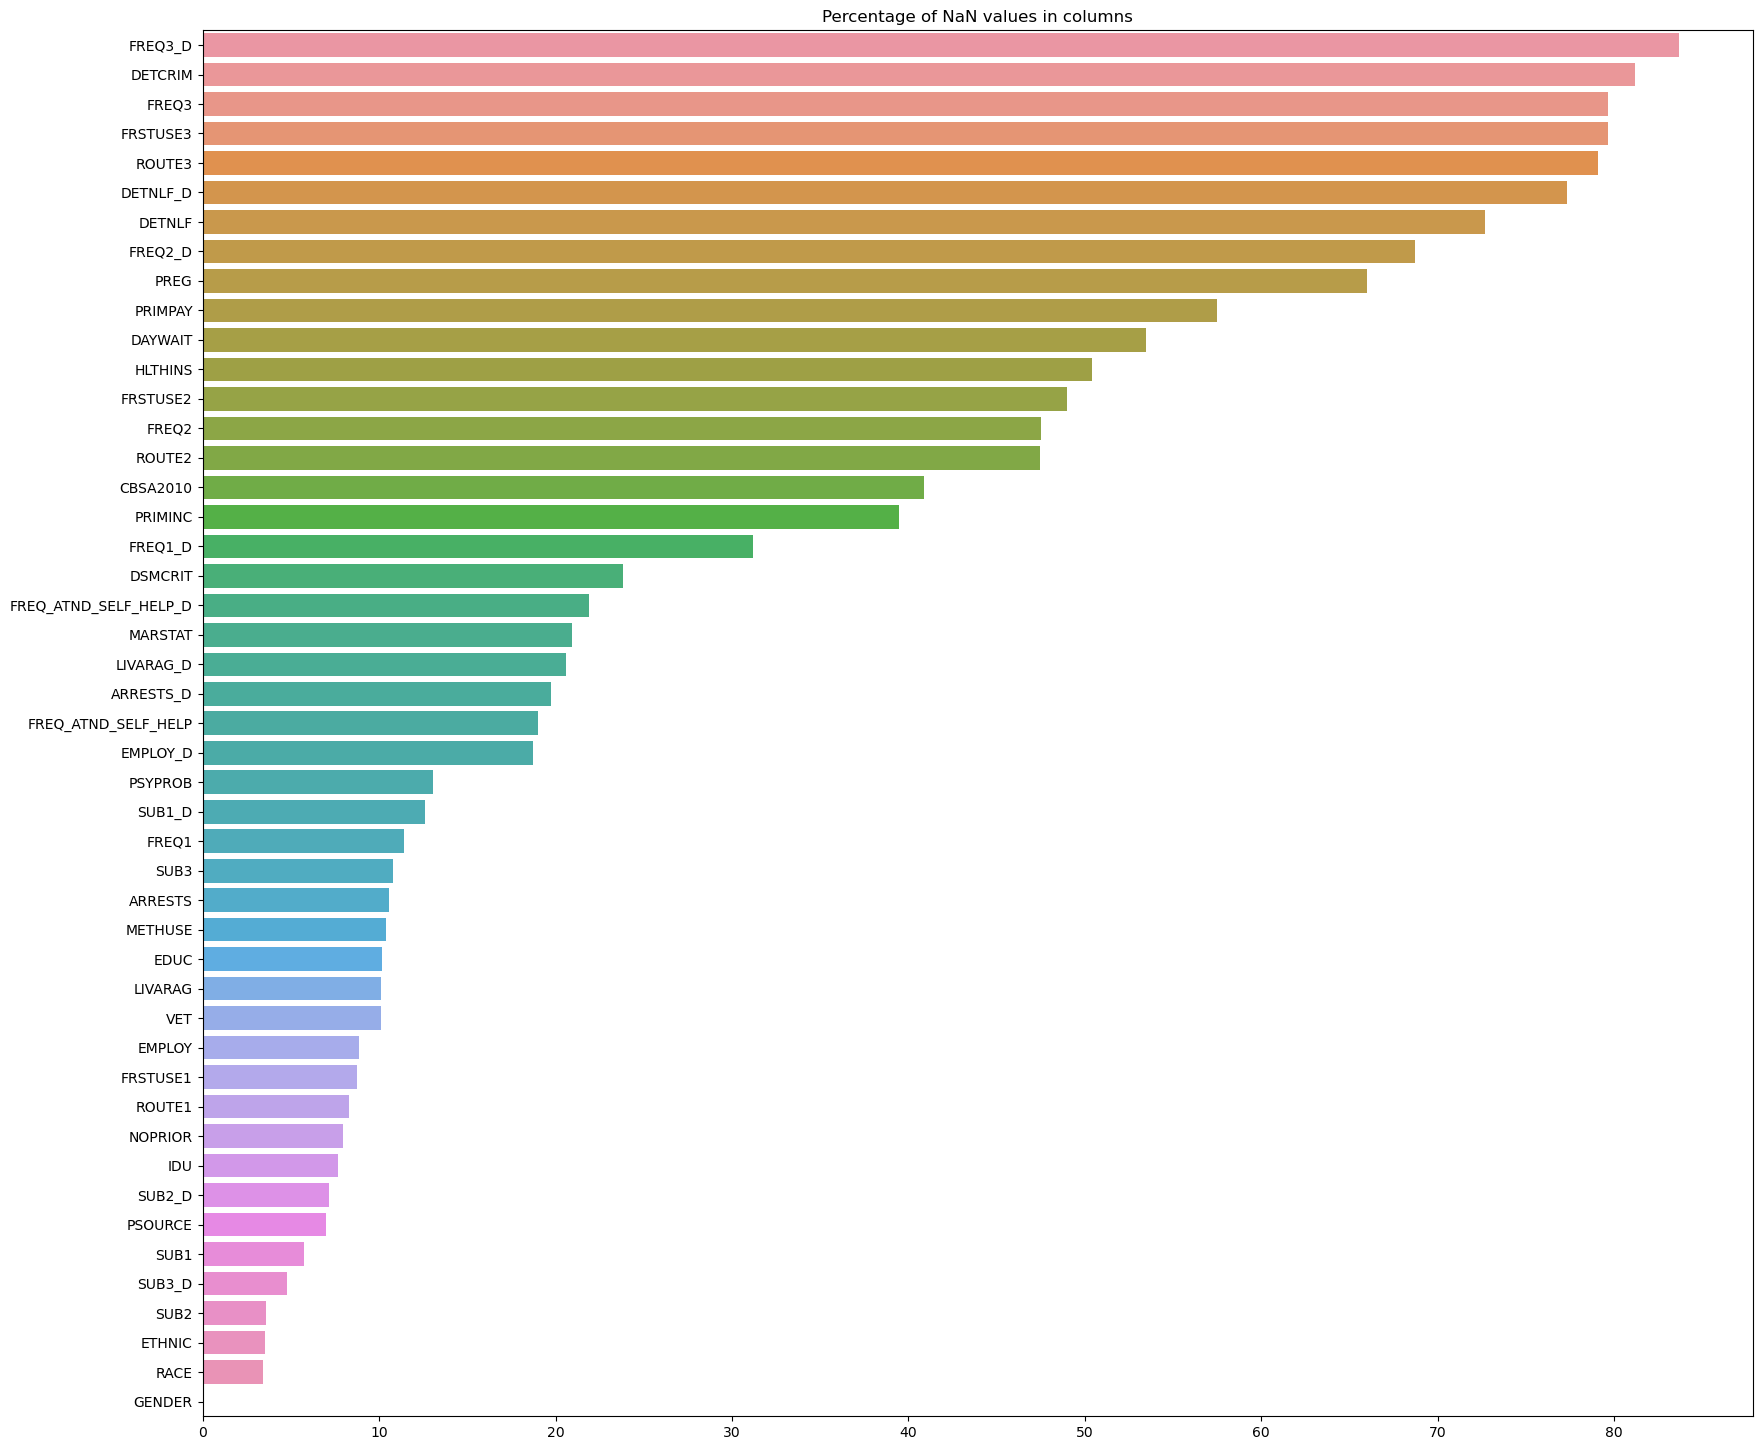

In [8]:
# Create a bar plot
plt.figure(figsize=(20,18))
sns.barplot(x=nan_percentage_sorted.values, y=nan_percentage_sorted.index)
plt.title('Percentage of NaN values in columns')
# Show the plot
print('Bar plot showing the percentage of NaN values in columns.')
plt.show()

In [9]:
reason = df1['REASON']
df1_corr = df1.corr()
df1_corr.unstack().sort_values()
variable = df1_corr['REASON'].sort_values()
print('Correlation of REASON with other variables.')
variable.tail(20)

Correlation of REASON with other variables.


SUB2          0.063243
EMPLOY_D      0.064399
SUB3          0.064653
PRIMPAY       0.077267
IDU           0.077986
HERFLG        0.078965
SUB1          0.085069
SUB3_D        0.089897
SUB1_D        0.097444
STFIPS        0.105826
SUB2_D        0.109217
ROUTE1        0.112305
OPSYNFLG      0.113998
ALCDRUG       0.118578
FREQ3_D       0.121826
FREQ1_D       0.148246
SERVICES_D    0.152773
SERVICES      0.154441
REASON        1.000000
DISYR              NaN
Name: REASON, dtype: float64

Visualizing the positive and negative correlations of REASON with other variables.


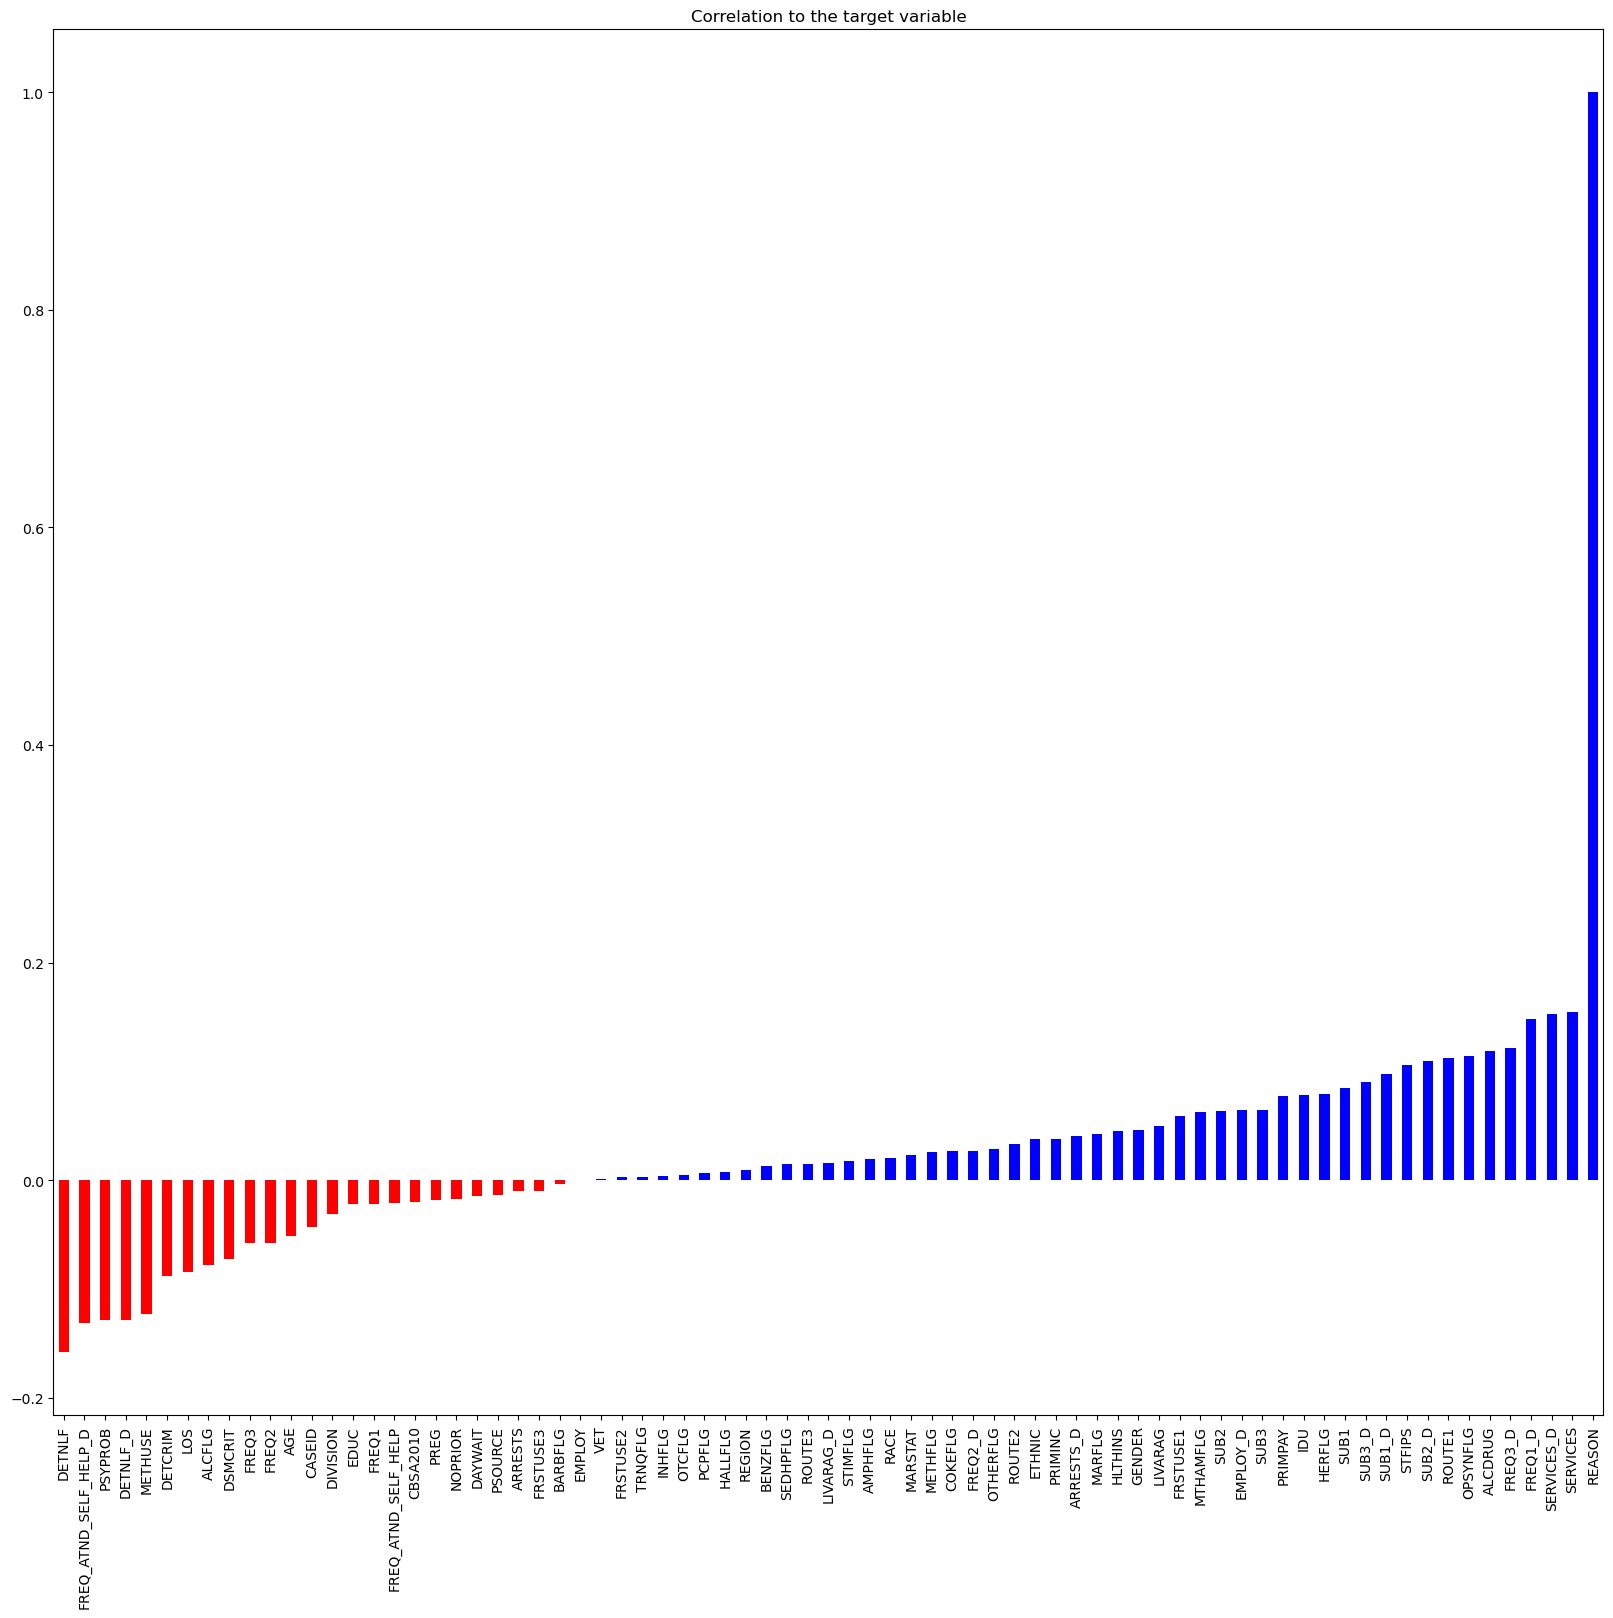

In [10]:
# Create a list of colors based on the values in 'variable'
colors = ['red' if x < 0 else 'blue' for x in variable[:-1]]

# Visualize correlation to the target variable 'REASON'
plt.figure(figsize=(20,18))
variable[:-1].plot(kind='bar', color=colors)
plt.title('Correlation to the target variable')
print('Visualizing the positive and negative correlations of REASON with other variables.')
plt.show()

Positive correlations of REASON with other variables.

SERVICES is the highest positive correlation and EMPLOY is the lowest positive correlation at the moment.

More exploration is needed to understand the relationship between the target variable and the features.


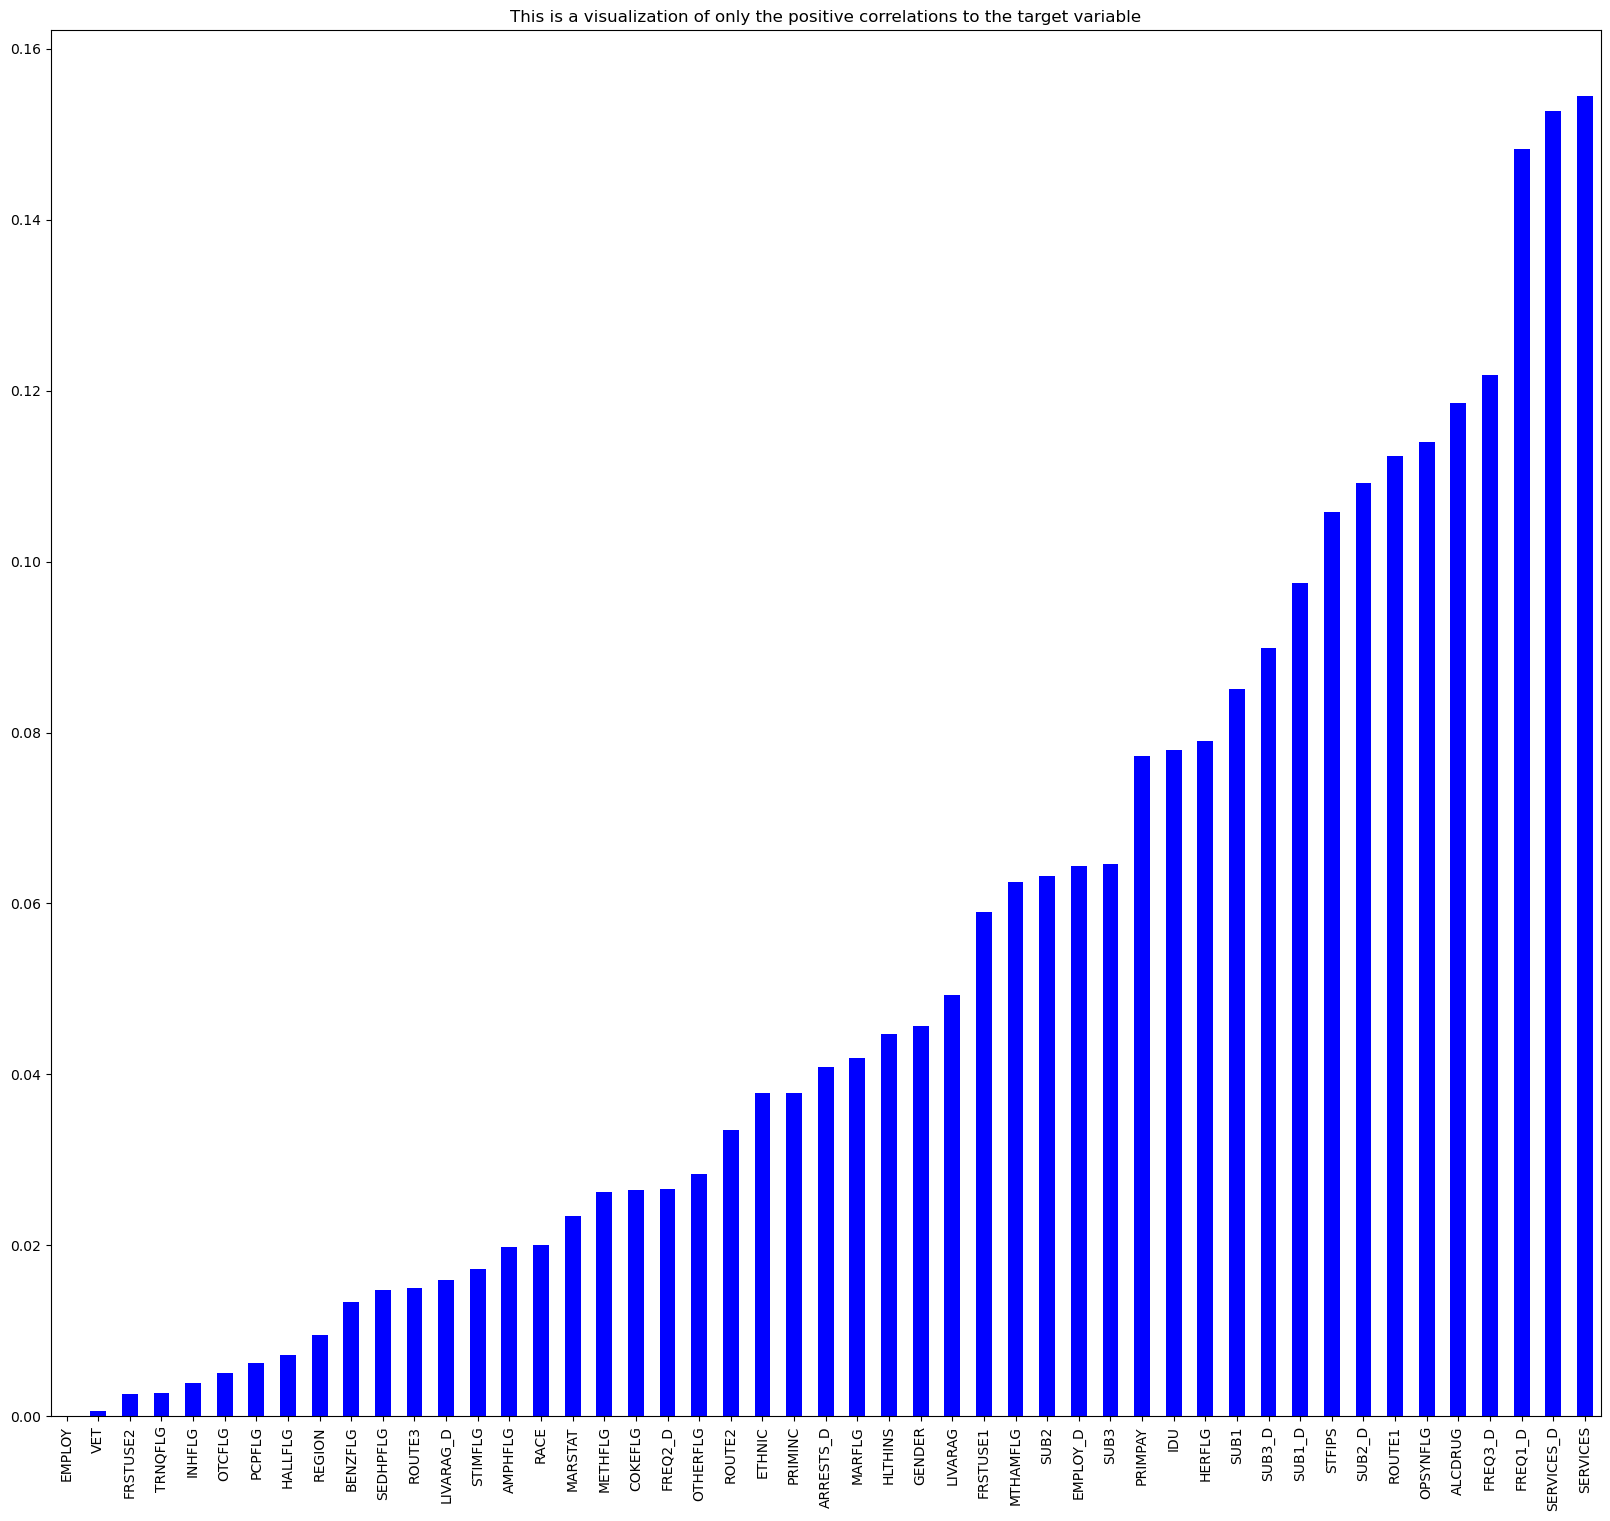

In [11]:
# Filter to include only positive correlations
positive_correlations = variable[variable > 0]

# Visualize positive correlations
plt.figure(figsize=(20,18))
positive_correlations[:-1].plot(kind='bar', color='blue')
plt.title('This is a visualization of only the positive correlations to the target variable')
print('Positive correlations of REASON with other variables.')
print("\nSERVICES is the highest positive correlation and EMPLOY is the lowest positive correlation at the moment.")
print("\nMore exploration is needed to understand the relationship between the target variable and the features.")
plt.show()

In [12]:
print('These are the columns with NaN values, with the highest percentage of NaN values at the top.')
print("\nFor example, the column FREQ3_D has roughly 83.66 precent of its values as NaN.")
print('\nThis means that 83.66 percent of the values in the column FREQ3_D are missing or not reported.')
display(nan_percentage_sorted)
display(df1_corr)

These are the columns with NaN values, with the highest percentage of NaN values at the top.

For example, the column FREQ3_D has roughly 83.66 precent of its values as NaN.

This means that 83.66 percent of the values in the column FREQ3_D are missing.


FREQ3_D                  83.657329
DETCRIM                  81.155679
FREQ3                    79.651588
FRSTUSE3                 79.646247
ROUTE3                   79.101110
DETNLF_D                 77.345700
DETNLF                   72.679757
FREQ2_D                  68.706412
PREG                     65.995066
PRIMPAY                  57.472991
DAYWAIT                  53.454537
HLTHINS                  50.424586
FRSTUSE2                 49.004501
FREQ2                    47.489206
ROUTE2                   47.443807
CBSA2010                 40.871395
PRIMINC                  39.482195
FREQ1_D                  31.182761
DSMCRIT                  23.820626
FREQ_ATND_SELF_HELP_D    21.886464
MARSTAT                  20.954216
LIVARAG_D                20.595262
ARRESTS_D                19.748180
FREQ_ATND_SELF_HELP      18.987137
EMPLOY_D                 18.743538
PSYPROB                  13.084157
SUB1_D                   12.610718
FREQ1                    11.429414
SUB3                

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
DISYR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASEID,NaN,1.000000,-0.395849,0.099756,-0.034999,0.000899,0.151766,0.188688,-0.091129,0.000903,...,0.001101,-0.006922,0.001784,-0.006500,-0.003061,0.057747,0.783701,0.779502,-0.013848,-0.204361
STFIPS,NaN,-0.395849,1.000000,0.044432,0.019586,0.047607,-0.069194,-0.221622,0.007340,0.015214,...,-0.004984,0.009955,0.013148,0.005615,-0.006261,0.009564,-0.481991,-0.476864,0.025432,0.209230
CBSA2010,NaN,0.099756,0.044432,1.000000,0.004145,0.001316,0.044540,0.040723,0.038879,0.014797,...,-0.000908,0.010150,-0.008264,-0.002533,0.000693,-0.047495,0.095494,0.029303,0.004611,0.000342
EDUC,NaN,-0.034999,0.019586,0.004145,1.000000,0.094803,-0.016739,0.047551,-0.015008,-0.065653,...,0.002528,0.015737,0.008056,0.003635,-0.003979,-0.007145,-0.033622,-0.029768,-0.014324,-0.068881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTHERFLG,NaN,0.057747,0.009564,-0.047495,-0.007145,0.008711,0.009161,0.007379,-0.044327,0.041467,...,-0.002088,-0.001574,-0.004060,-0.002635,-0.000120,1.000000,0.046007,0.062579,-0.013986,0.096798
DIVISION,NaN,0.783701,-0.481991,0.095494,-0.033622,0.045090,0.199472,0.148816,-0.020822,0.082038,...,0.004455,-0.010410,0.000311,-0.001392,0.000204,0.046007,1.000000,0.968539,-0.037167,-0.194418
REGION,NaN,0.779502,-0.476864,0.029303,-0.029768,0.036614,0.217648,0.149000,-0.055054,0.054880,...,0.003635,-0.013041,0.001982,-0.001449,-0.000814,0.062579,0.968539,1.000000,-0.031460,-0.212139
IDU,NaN,-0.013848,0.025432,0.004611,-0.014324,-0.039367,-0.058923,-0.065066,-0.075624,-0.102765,...,-0.000783,-0.005834,-0.000872,-0.009999,-0.009837,-0.013986,-0.037167,-0.031460,1.000000,0.073587


Looking for common columns in two sets of column names to see if they need be removed or filled.

Column Names from the First Set:(nan_percentage_sorted)
"FREQ3_D", "DETCRIM", "FREQ3", "FRSTUSE3", "ROUTE3", "DETNLF_D", "DETNLF", "FREQ2_D", "PREG", "PRIMPAY", "DAYWAIT", "HLTHINS", "FRSTUSE2", "FREQ2", "ROUTE2", "CBSA2010", "PRIMINC", "FREQ1_D", "DSMCRIT", "FREQ_ATND_SELF_HELP_D", "MARSTAT", "LIVARAG_D", "ARRESTS_D", "FREQ_ATND_SELF_HELP", "EMPLOY_D", "PSYPROB", "SUB1_D", "FREQ1", "SUB3", "ARRESTS", "METHUSE", "EDUC", "LIVARAG", "VET", "EMPLOY", "FRSTUSE1", "ROUTE1", "NOPRIOR", "IDU", "SUB2_D", "PSOURCE", "SUB1", "SUB3_D", "SUB2", "ETHNIC", "RACE", "GENDER"

Column Names from the Second Set:(df1_corr)
"DISYR", "CASEID", "STFIPS", "CBSA2010", "EDUC", "MARSTAT", "SERVICES", "DETCRIM", "LOS", "PSOURCE", "TRNQFLG", "BARBFLG", "SEDHPFLG", "INHFLG", "OTCFLG", "OTHERFLG", "DIVISION", "REGION", "IDU", "ALCDRUG"

Common Column Names: (To consider for removal/fill)
"CBSA2010", "DETCRIM", "PSOURCE"

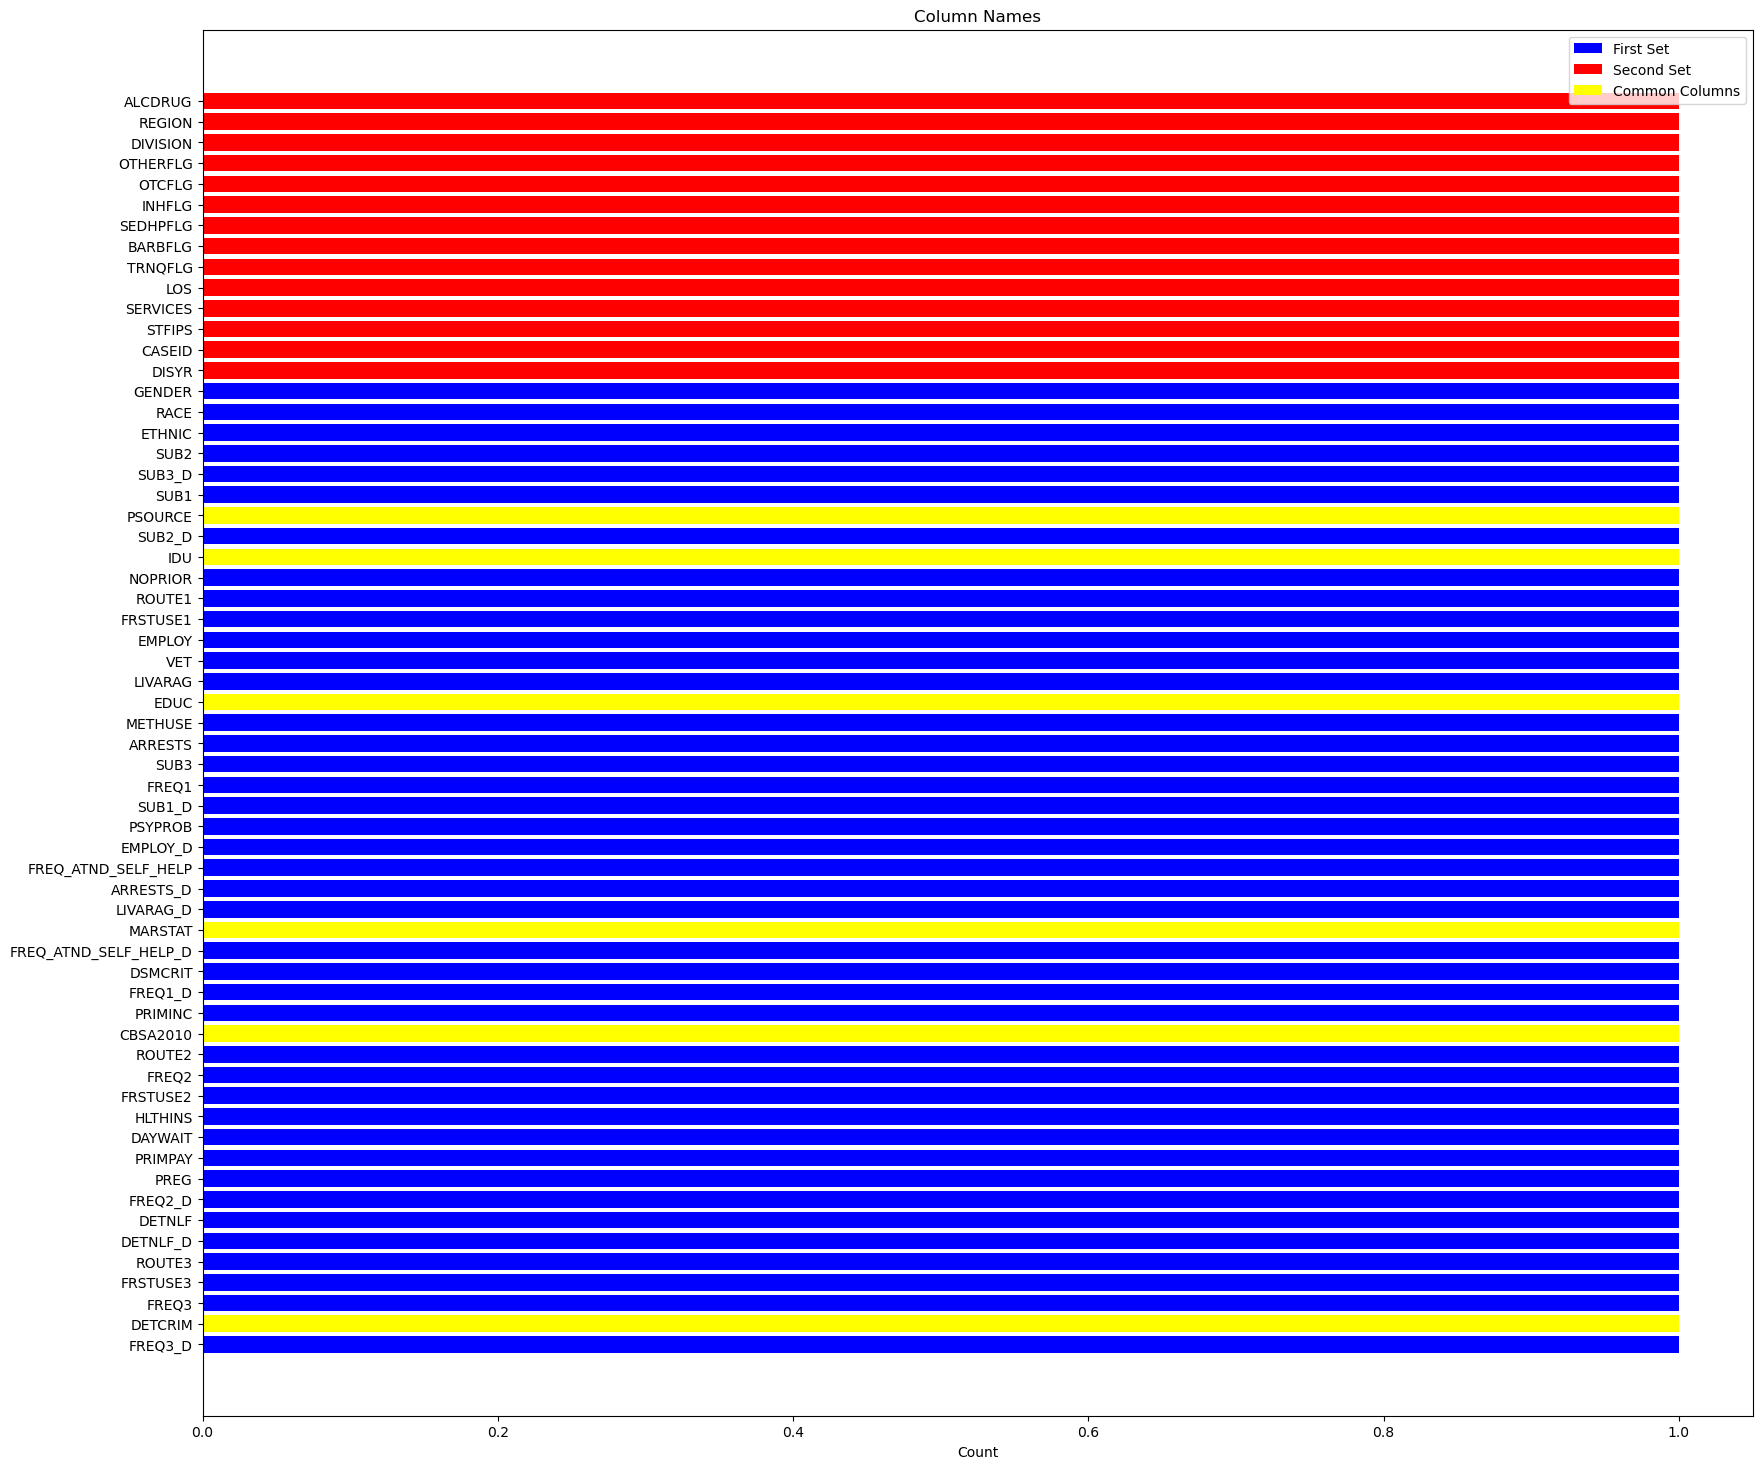

DETCRIM     81.155679
CBSA2010    40.871395
MARSTAT     20.954216
EDUC        10.155860
IDU          7.651482
PSOURCE      6.994298
dtype: float64

In [43]:
# Define the column names from the first set
first_set = [
    "FREQ3_D", "DETCRIM", "FREQ3", "FRSTUSE3", "ROUTE3", "DETNLF_D", "DETNLF",
    "FREQ2_D", "PREG", "PRIMPAY", "DAYWAIT", "HLTHINS", "FRSTUSE2", "FREQ2",
    "ROUTE2", "CBSA2010", "PRIMINC", "FREQ1_D", "DSMCRIT", "FREQ_ATND_SELF_HELP_D",
    "MARSTAT", "LIVARAG_D", "ARRESTS_D", "FREQ_ATND_SELF_HELP", "EMPLOY_D", "PSYPROB",
    "SUB1_D", "FREQ1", "SUB3", "ARRESTS", "METHUSE", "EDUC", "LIVARAG", "VET", "EMPLOY",
    "FRSTUSE1", "ROUTE1", "NOPRIOR", "IDU", "SUB2_D", "PSOURCE", "SUB1", "SUB3_D",
    "SUB2", "ETHNIC", "RACE", "GENDER"
]

# Define the column names from the second set
second_set = [
    "DISYR", "CASEID", "STFIPS", "CBSA2010", "EDUC", "MARSTAT", "SERVICES",
    "DETCRIM", "LOS", "PSOURCE", "TRNQFLG", "BARBFLG", "SEDHPFLG", "INHFLG",
    "OTCFLG", "OTHERFLG", "DIVISION", "REGION", "IDU", "ALCDRUG"
]

# Find the common column names
common_columns = list(set(first_set).intersection(second_set))

# Add quotations around each column name
first_set_quoted = [f'"{col}"' for col in first_set]
second_set_quoted = [f'"{col}"' for col in second_set]
common_columns_quoted = [f'"{col}"' for col in common_columns]

# Print the results
print("Looking for common columns in two sets of column names to see if they need be removed or filled.")
print("\nColumn Names from the First Set:(nan_percentage_sorted)")
print(", ".join(first_set_quoted))
print("\nColumn Names from the Second Set:(df1_corr)")
print(", ".join(second_set_quoted))
print("\nCommon Column Names: (To consider for removal/fill)")
print(", ".join(common_columns_quoted))

plt.figure(figsize=(20,18))
plt.barh(first_set, [1]*len(first_set), color='blue', label='First Set')
plt.barh(second_set, [1]*len(second_set), color='red', label='Second Set')
plt.barh(common_columns, [1]*len(common_columns), color='yellow', label='Common Columns')
plt.xlabel('Count')
plt.title('Column Names')
plt.legend()
plt.show()

# Find the Nan percentages in the common columns
nan_percentages_common = df1[common_columns].isna().mean() * 100

# Sort and display the result
nan_percentages_common_sorted = nan_percentages_common.sort_values(ascending=False)
display(nan_percentages_common_sorted)

More Data Cleaning

Columns that need clarification:
* ROUTE2
* IDU 
* HLTHINS

In [30]:
# In column FRSTUSE1 replace -9 with 0
df1['FRSTUSE1'] = df1['FRSTUSE1'].replace(-9, 0)
print(df1['FRSTUSE1'].value_counts())

FRSTUSE1
3.0    383118
4.0    286597
2.0    282460
5.0    191686
7.0    189684
6.0    143891
1.0     94488
Name: count, dtype: int64


In [33]:
# In column FRSTUSE2 replace -9 with 0
df1['FRSTUSE2'] = df1['FRSTUSE2'].replace(-9, 0)
print(df1['FRSTUSE2'].value_counts())

FRSTUSE2
3.0    222974
2.0    170892
4.0    153705
7.0    103384
5.0     95617
6.0     78339
1.0     53488
Name: count, dtype: int64


In [37]:
# In column FRSTUSE3 replace -9 with 0
df1['FRSTUSE3'] = df1['FRSTUSE3'].replace(-9, 0)
print(df1['FRSTUSE3'].value_counts())

FRSTUSE3
3.0    92397
2.0    78630
4.0    57055
7.0    37209
5.0    32205
6.0    27655
1.0    25443
Name: count, dtype: int64


In [31]:
# In column SUB2 replace -9 with 19
df1['SUB2'] = df1['SUB2'].replace(-9, 19)
print(df1['SUB2'].value_counts())

SUB2
1.0     750100
4.0     231573
3.0     187237
2.0     150904
10.0    108974
5.0      64161
7.0      64062
13.0     49362
19.0     25183
11.0      9428
12.0      4256
16.0      3651
9.0       3202
8.0       2851
6.0       2808
18.0       882
17.0       667
15.0       582
14.0       304
Name: count, dtype: int64


In [32]:
# In column SUB2_D replace -9 with 19
df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 19)
print(df1['SUB2_D'].value_counts())

SUB2_D
1.0     813505
4.0     210739
3.0     156567
2.0     129235
10.0     89820
7.0      56850
5.0      54200
13.0     39421
19.0     24142
11.0      8690
12.0      3626
16.0      3419
9.0       2753
6.0       2219
8.0       2067
18.0       719
17.0       617
15.0       496
14.0       245
Name: count, dtype: int64


In [34]:
# In column SUB3 replace -9 with 19
df1['SUB3'] = df1['SUB3'].replace(-9, 19)
print(df1['SUB3'].value_counts())

SUB3
1.0     1181959
4.0       96270
2.0       59889
3.0       57346
13.0      29996
10.0      26240
7.0       24731
19.0      22209
5.0       17234
11.0       6402
9.0        3775
12.0       3767
16.0       2193
8.0        1600
6.0        1439
18.0        663
17.0        456
15.0        348
14.0        116
Name: count, dtype: int64


In [35]:
# In column SUB3_D replace -9 with 0
df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
print(df1['SUB3_D'].value_counts())

SUB3_D
1.0     1316613
4.0       86433
2.0       55708
3.0       47780
10.0      29027
13.0      25784
7.0       22480
19.0      22280
5.0       15445
11.0       5947
9.0        3451
12.0       2809
16.0       2326
8.0        1341
6.0        1030
18.0        602
17.0        433
15.0        333
14.0        138
Name: count, dtype: int64


In [36]:
# In column ROUTE3 replace -9 with 0
df1['ROUTE3'] = df1['ROUTE3'].replace(-9, 0)
print(df1['ROUTE3'].value_counts())

ROUTE3
2.0    154215
1.0    122303
3.0     48044
4.0     31983
5.0      3439
Name: count, dtype: int64


In [38]:
# In column DSMCRIT replace -9 with 0
df1['DSMCRIT'] = df1['DSMCRIT'].replace(-9, 0)
print(df1['DSMCRIT'].value_counts())

DSMCRIT
5.0     380512
4.0     289535
8.0     143441
19.0    125445
7.0      82105
6.0      56213
9.0      52972
2.0      40101
10.0     39565
3.0      29130
11.0     23297
12.0     17972
1.0      12628
13.0      7786
15.0      5239
17.0      2246
14.0      2181
16.0      1490
18.0       334
Name: count, dtype: int64


In [39]:
# In column PSYPROB replace -9 with 0
df1['PSYPROB'] = df1['PSYPROB'].replace(-9, 0)
print(df1['PSYPROB'].value_counts())

PSYPROB
2.0    823223
1.0    673905
Name: count, dtype: int64


In [40]:
# In column PRIMPAY replace -9 with 0
df1['PRIMPAY'] = df1['PRIMPAY'].replace(-9, 0)
print(df1['PRIMPAY'].value_counts())

PRIMPAY
4.0    389616
5.0    162022
7.0     49127
1.0     48470
2.0     44071
6.0     20758
3.0     18465
Name: count, dtype: int64


In [41]:
# In column FREQ_ATND_SELF_HELP replace -9 with 0
df1['FREQ_ATND_SELF_HELP'] = df1['FREQ_ATND_SELF_HELP'].replace(-9, 0)
print(df1['FREQ_ATND_SELF_HELP'].value_counts())

FREQ_ATND_SELF_HELP
1.0    1037604
4.0     126267
2.0     104522
5.0      65074
3.0      61982
Name: count, dtype: int64


In [42]:
# In column FREQ_ATND_SELF_HELP_D replace -9 with 0
df1['FREQ_ATND_SELF_HELP_D'] = df1['FREQ_ATND_SELF_HELP_D'].replace(-9, 0)
print(df1['FREQ_ATND_SELF_HELP_D'].value_counts())

FREQ_ATND_SELF_HELP_D
1.0    859331
4.0    186509
2.0    115895
5.0    107791
3.0     75982
Name: count, dtype: int64
